In [1]:
# libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set plot style
plt.style.use("seaborn-v0_8")

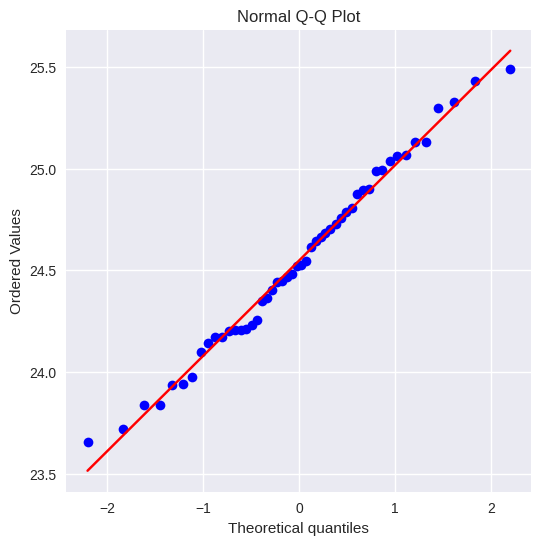

In [2]:
# Data Loading and Normality Check
df = pd.read_csv("davkovac.txt", sep=r"\s+", header=None, names=["weight"])
x = df["weight"].values

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(x, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [3]:
# Shapiro-Wilk normality test
print(stats.shapiro(x))

ShapiroResult(statistic=np.float64(0.9840624645469049), pvalue=np.float64(0.7306730022559098))


TtestResult(statistic=np.float64(-6.98745458536545), pvalue=np.float64(6.937276899974056e-09), df=np.int64(49))
Confidence Interval: (np.float64(24.41658179742744), np.float64(24.677206202572556))


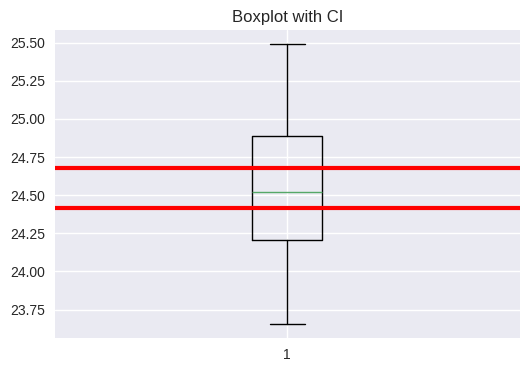

In [4]:
# Two-sided t-test
# Testing if the mean is equal to 25.0
test_res = stats.ttest_1samp(x, popmean=25.0)
print(test_res)

# Confidence Interval (95%)
ci = stats.t.interval(
    confidence=0.95, df=len(x) - 1, loc=np.mean(x), scale=stats.sem(x)
)
print(f"Confidence Interval: {ci}")

plt.figure(figsize=(6, 4))
plt.boxplot(x)
plt.axhline(y=ci[0], color="r", linewidth=3)
plt.axhline(y=ci[1], color="r", linewidth=3)
plt.title("Boxplot with CI")
plt.show()

TtestResult(statistic=np.float64(-6.98745458536545), pvalue=np.float64(3.468638449987028e-09), df=np.int64(49))


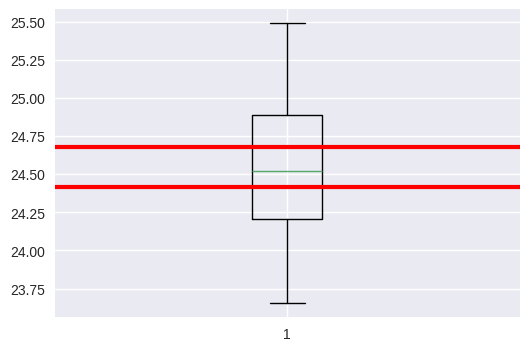

In [ ]:
# One-sided t-tests
# Testing if the mean is less than 25
test_res = stats.ttest_1samp(x, popmean=25.0, alternative="less")
print(test_res)

# One-sided CI (upper bound is infinity)
ci_upper = stats.t.interval(
    confidence=0.90, df=len(x) - 1, loc=np.mean(x), scale=stats.sem(x)
)[1]  # approx for visualization

plt.figure(figsize=(6, 4))
plt.boxplot(x)
ci = stats.t.interval(
    confidence=0.95, df=len(x) - 1, loc=np.mean(x), scale=stats.sem(x)
)
plt.axhline(y=ci[0], color="r", linewidth=3)
plt.axhline(y=ci[1], color="r", linewidth=3)
plt.show()

TtestResult(statistic=np.float64(-6.98745458536545), pvalue=np.float64(0.9999999965313615), df=np.int64(49))


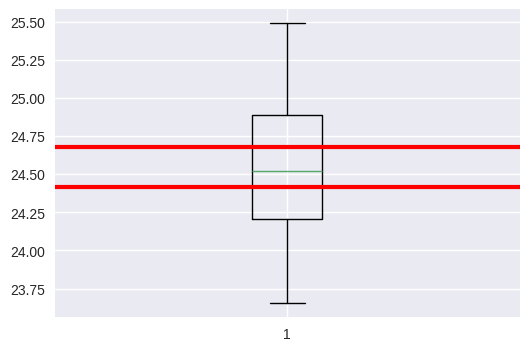

In [6]:
# Testing if the mean is greater than 25
test_res = stats.ttest_1samp(x, popmean=25.0, alternative="greater")
print(test_res)

plt.figure(figsize=(6, 4))
plt.boxplot(x)
ci = stats.t.interval(
    confidence=0.95, df=len(x) - 1, loc=np.mean(x), scale=stats.sem(x)
)
plt.axhline(y=ci[0], color="r", linewidth=3)
plt.axhline(y=ci[1], color="r", linewidth=3)
plt.show()

In [7]:
# Load data for two-sample tests
x_data = pd.read_csv("dodavatelX.txt", sep=r"\s+", header=None).values.flatten()
y_data = pd.read_csv("dodavatelY.txt", sep=r"\s+", header=None).values.flatten()

/tmp/ipykernel_12499/706523109.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x_data, y_data], labels=["X", "Y"])


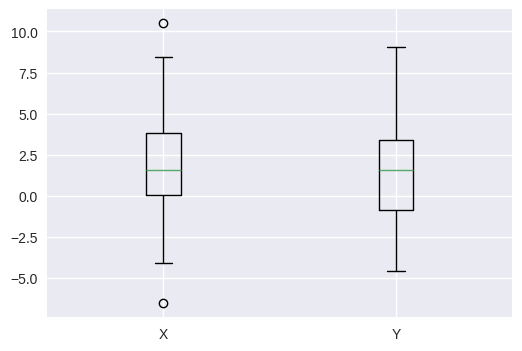

In [8]:
# Boxplot comparison
plt.figure(figsize=(6, 4))
plt.boxplot([x_data, y_data], labels=["X", "Y"])
plt.show()

In [9]:
# Normality test for X
print("Shapiro X:", stats.shapiro(x_data))

Shapiro X: ShapiroResult(statistic=np.float64(0.9902344137050411), pvalue=np.float64(0.555393454847715))


In [10]:
# Normality test for Y
print("Shapiro Y:", stats.shapiro(y_data))

Shapiro Y: ShapiroResult(statistic=np.float64(0.984471471366435), pvalue=np.float64(0.2907273443449826))


In [11]:
# F-test for equality of variances
# Python doesn't have a direct var.test, using Levene or Bartlett is common, or manual F-test
# Manual F-test
f = np.var(x_data, ddof=1) / np.var(y_data, ddof=1)
df1 = len(x_data) - 1
df2 = len(y_data) - 1
p_value = 2 * min(stats.f.cdf(f, df1, df2), 1 - stats.f.cdf(f, df1, df2))
print(f"F-test: F={f:.4f}, p-value={p_value:.4f}")

# Levene test (more robust)
print("Levene test:", stats.levene(x_data, y_data))

F-test: F=0.8712, p-value=0.4701
Levene test: LeveneResult(statistic=np.float64(0.8596403661536917), pvalue=np.float64(0.3548646972015147))


In [12]:
# Two-sample t-test (equal variances)
print(stats.ttest_ind(x_data, y_data, equal_var=True))

TtestResult(statistic=np.float64(1.037465926488253), pvalue=np.float64(0.30066814133718783), df=np.float64(218.0))


In [13]:
# Read data for paired samples
pred = pd.read_csv("pred_cvicenim.txt", sep=r"\s+", header=None).values.flatten()
po = pd.read_csv("po_cviceni.txt", sep=r"\s+", header=None).values.flatten()
print(pd.DataFrame({"pred": pred[:10], "po": po[:10]}))  # Show first 10

        pred         po
0  12.666378  14.889379
1   7.322789   8.627612
2  15.021706   9.867455
3  13.616913  13.141168
4  10.970712   9.249122
5   5.464451   8.490774
6   9.999636  10.217290
7  15.693764  10.724403
8  13.771444  14.669450
9  17.065310  14.243944


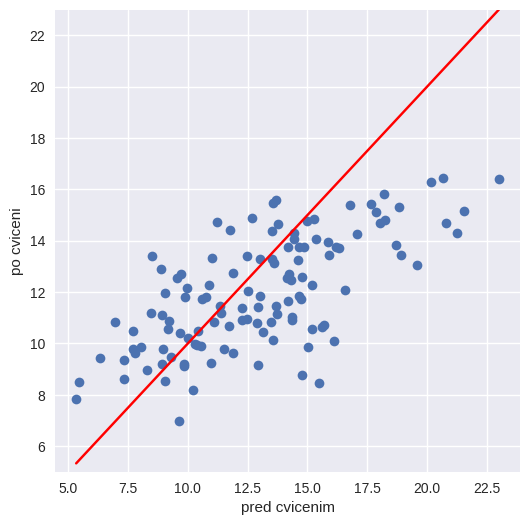

/tmp/ipykernel_12499/1138801112.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pred, po], labels=["pred cvicenim", "po cviceni"])


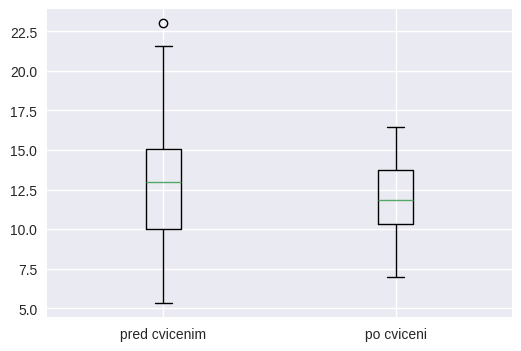

In [14]:
# Visual comparison of paired data
plt.figure(figsize=(6, 6))
plt.plot(pred, po, "o")
plt.xlabel("pred cvicenim")
plt.ylabel("po cviceni")
plt.ylim(5, 23)

# Identity line
xfit = np.linspace(min(pred), max(pred), 40)
plt.plot(xfit, xfit, "r-")
plt.show()

plt.figure(figsize=(6, 4))
plt.boxplot([pred, po], labels=["pred cvicenim", "po cviceni"])
plt.show()

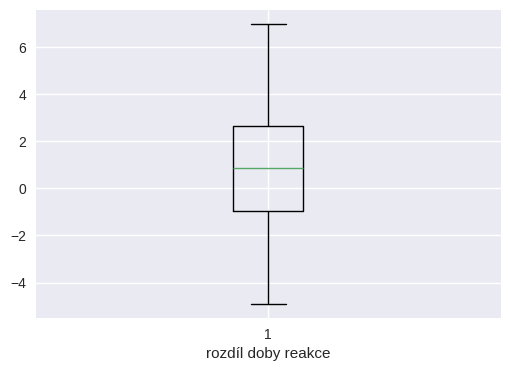

In [15]:
# Calculate differences
rozdil = pred - po
plt.figure(figsize=(6, 4))
plt.boxplot(rozdil)
plt.xlabel("rozdíl doby reakce")
plt.show()

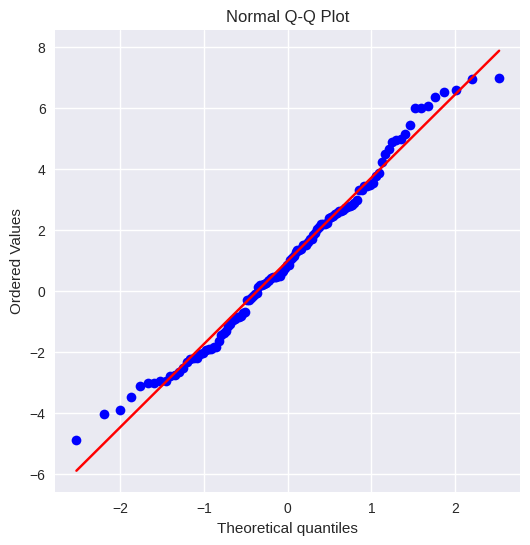

In [16]:
# Data Loading and Normality Check (Differences)
plt.figure(figsize=(6, 6))
stats.probplot(rozdil, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [17]:
# One-sample t-test on differences
print(stats.ttest_1samp(rozdil, popmean=0))

TtestResult(statistic=np.float64(4.039114874897356), pvalue=np.float64(9.540914917589877e-05), df=np.int64(119))


In [18]:
# Paired t-test
print(stats.ttest_rel(pred, po))

TtestResult(statistic=np.float64(4.039114874897356), pvalue=np.float64(9.540914917589877e-05), df=np.int64(119))


In [19]:
# Wilcoxon signed-rank test (one sample)
# Testing x against mu=25 (from earlier part of notebook)
# stats.wilcoxon tests against zero, so we subtract mu
print(stats.wilcoxon(x - 25))

WilcoxonResult(statistic=np.float64(113.0), pvalue=np.float64(2.6378053519238165e-08))


In [20]:
# Wilcoxon rank-sum test (two independent samples)
# Using pred and po as independent samples (just for demo, they are actually paired)
print(stats.ranksums(pred, po))

RanksumsResult(statistic=np.float64(2.026876809007765), pvalue=np.float64(0.0426750127776383))


In [21]:
# Wilcoxon signed-rank test (paired)
print(stats.wilcoxon(pred, po))

WilcoxonResult(statistic=np.float64(2287.0), pvalue=np.float64(0.0004362216620143773))


In [22]:
# Sign test
print(
    stats.binomtest(k=np.sum(rozdil > 0), n=len(rozdil), p=0.5, alternative="two-sided")
)

BinomTestResult(k=77, n=120, alternative='two-sided', statistic=0.6416666666666667, pvalue=0.002446856762814173)
